<a href="https://colab.research.google.com/github/AV-Gorshkov/Python_netology/blob/main/PY_%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B5_%D0%BF%D0%BE%D0%BD%D1%8F%D1%82%D0%B8%D1%8F_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B8_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# импорт библиотек

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Задание 1. Загрузка данных
Изучить представленный набор данных на основе описания его столбцов, загрузить его и оставить 8 столбцов для дальнейшего изучения: surgery?, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.

In [ ]:
param = r'/content/drive/My Drive/Нетология/PY_Статистика/дз/'

file = 'horse_data.csv'

df_horse= pd.read_csv(f'{param}{file}',
         names = ['surgery','age','hospital number','rectal temperature','pulse',\
                  'respiratory rate','temperature of extremities','peripheral pulse',\
                  'mucous membranes','capillary refill time','pain','peristalsis',\
                  'abdominal distension','nasogastric tube','nasogastric reflux',\
                  'nasogastric reflux PH','rectal examination - feces','abdomen',\
                  'packed cell volume','total protein','abdominocentesis appearance',\
                  'abdomcentesis total protein','outcome','surgical lesion',\
                  'type of lesion_1','type of lesion_2','type of lesion_3','cp_data'],
         sep = ',', na_values='?')

df_horse = df_horse[['surgery', 'age', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'pain', 'outcome']]

df_horse.head()

,surgery,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0



Задание 2. Первичное изучение данных
Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

In [ ]:
# описательная статистика по ДатаФрейму
df_horse.describe()

,surgery,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,299.000000,300.000000,240.000000,276.000000,242.000000,244.000000,245.00000,299.000000
mean,1.397993,1.640000,38.167917,71.913043,30.417355,2.348361,2.95102,1.551839
std,0.490305,2.173972,0.732289,28.630557,17.642231,1.045054,1.30794,0.737187
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.00000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.500000,1.000000,2.00000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,24.500000,3.000000,3.00000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.00000,2.000000
max,2.000000,9.000000,40.800000,184.000000,96.000000,4.000000,5.00000,3.000000


In [ ]:
df_horse.shape

(300, 8)

In [ ]:
df_horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     299 non-null    float64
 1   age                         300 non-null    int64  
 2   rectal temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory rate            242 non-null    float64
 5   temperature of extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


Изучив описание к ДатаФрейму, разделим оставшиеся солбцы по типам данных:

Количественные / Категориальные (возможные варианты категорий)

Категории:
surgery = (1,2);
Age = (1,2);
temperature of extremities = (1,2,3,4);
pain = (1,2,3,4,5);
outcome = (1,2,3);

Дискретные:
rectal temperature;
pulse;
respiratory rate

In [ ]:
# Изучим данные в категориальных столбцах. Определим уникальные значения по столбцам и кол-во элементов по каждой категории

print( f"surgery\n  category\n{df_horse['surgery'].unique()}" )
print( f"  count\n{df_horse['surgery'].value_counts()}" )
print('-------')

print( f"age\n  category\n{df_horse['age'].unique()}" )
print( f"count\n{df_horse['age'].value_counts()}")
print('-------')

print( f"temp_of_extrem\n  category\n{df_horse['temperature of extremities'].unique()}" )
print( f"  count\n{df_horse['temperature of extremities'].value_counts()}" )
print('-------')

print( f"pain\n  category\n{df_horse['pain'].unique()}" )
print( f"  count\n{df_horse['pain'].value_counts()}" )
print('-------')

print( f"outcome\n  category\n{df_horse['outcome'].unique()}" )
print( f"  count\n{df_horse['outcome'].value_counts()}" )

surgery
  category
[ 2.  1. nan]
  count
1.0    180
2.0    119
Name: surgery, dtype: int64
-------
age
  category
[1 9]
count
1    276
9     24
Name: age, dtype: int64
-------
temp_of_extrem
  category
[ 3. nan  1.  4.  2.]
  count
3.0    109
1.0     78
2.0     30
4.0     27
Name: temperature of extremities, dtype: int64
-------
pain
  category
[ 5.  3.  2. nan  4.  1.]
  count
3.0    67
2.0    59
5.0    42
4.0    39
1.0    38
Name: pain, dtype: int64
-------
outcome
  category
[ 2.  3.  1. nan]
  count
1.0    178
2.0     77
3.0     44
Name: outcome, dtype: int64


In [ ]:
# Заметим, что категория 'age' состоит из значений "1" и "9" ("9" встречается 24 раза). В описании указаны возможные варианты к столбцу "1" и "2". Предположим, что это какая-то ошибка/опечатка и заменим значение "9" на "2"

df_horse['age'] = df_horse['age'].apply( lambda age: 2 if age == 9 else age )

print( df_horse['age'].unique() )

[1 2]


<ipython-input-7-68d3f4b5c212>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_horse['age'] = df_horse['age'].apply( lambda age: 2 if age == 9 else age )


In [ ]:
# Значение Моды:

print( f"surgery: {df_horse['surgery'].mode()[0]}" )
print( f"age: {df_horse['age'].mode()[0]}" )
print( f"rectal_temp: {df_horse['rectal temperature'].mode()[0]}" )
print( f"pulse: {df_horse['pulse'].mode()[0]}" )
print( f"respiratiry_rate: {df_horse['respiratory rate'].mode()[0]}" )
print( f"temp_of_extrem: {df_horse['temperature of extremities'].mode()[0]}" )
print( f"pain: {df_horse['pain'].mode()[0]}" )
print( f"outcome: {df_horse['outcome'].mode()[0]}" )


surgery: 1.0
age: 1
rectal_temp: 38.0
pulse: 48.0
respiratiry_rate: 20.0
temp_of_extrem: 3.0
pain: 3.0
outcome: 1.0


In [ ]:
# Межквартильный размах

IQR_surgery = df_horse['surgery'].quantile(0.75) - df_horse['surgery'].quantile(0.25)
print( f"surgery: {IQR_surgery}" )

IQR_age = df_horse['age'].quantile(0.75) - df_horse['age'].quantile(0.25)
print( f"age: {IQR_age}" )

IQR_rectal_temp = df_horse['rectal temperature'].quantile(0.75) - df_horse['rectal temperature'].quantile(0.25)
print( f"rectal_temp: {IQR_rectal_temp}" )

IQR_pulse = df_horse['pulse'].quantile(0.75) - df_horse['pulse'].quantile(0.25)
print( f"pulse: {IQR_pulse}" )

IQR_prespiratiry_rate = df_horse['respiratory rate'].quantile(0.75) - df_horse['respiratory rate'].quantile(0.25)
print( f"respiratiry_rate: {IQR_prespiratiry_rate}" )

IQR_temp_of_extrem = df_horse['temperature of extremities'].quantile(0.75) - df_horse['temperature of extremities'].quantile(0.25)
print( f"temp_of_extrem: {IQR_temp_of_extrem}" )

IQR_pain = df_horse['pain'].quantile(0.75) - df_horse['pain'].quantile(0.25)
print( f"pain: {IQR_pain}" )

IQR_outcome = df_horse['outcome'].quantile(0.75) - df_horse['outcome'].quantile(0.25)
print( f"outcome: {IQR_outcome}" )

surgery: 1.0
age: 0.0
rectal_temp: 0.7000000000000028
pulse: 40.0
respiratiry_rate: 17.5
temp_of_extrem: 2.0
pain: 2.0
outcome: 1.0


In [ ]:
# Значение СКО

print( f"surgery: {df_horse['surgery'].std()}" )
print( f"age: {df_horse['age'].std()}" )
print( f"rectal_temp: {df_horse['rectal temperature'].std()}" )
print( f"pulse: {df_horse['pulse'].std()}" )
print( f"respiratiry_rate: {df_horse['respiratory rate'].std()}" )
print( f"temp_of_extrem: {df_horse['temperature of extremities'].std()}" )
print( f"pain: {df_horse['pain'].std()}" )
print( f"outcome: {df_horse['outcome'].std()}")

surgery: 0.4903046443288189
age: 0.27174648819470293
rectal_temp: 0.7322886641121578
pulse: 28.630556660735
respiratiry_rate: 17.64223138513467
temp_of_extrem: 1.0450536920112763
pain: 1.3079395711243496
outcome: 0.7371869448054943


In [ ]:
# Значение Дисперсии

print( f"surgery: {df_horse['surgery'].var()}" )
print( f"age: {df_horse['age'].var()}" )
print( f"rectal_temp: {df_horse['rectal temperature'].var()}" )
print( f"pulse: {df_horse['pulse'].var()}" )
print( f"respiratiry_rate: {df_horse['respiratory rate'].var()}" )
print( f"temp_of_extrem: {df_horse['temperature of extremities'].var()}" )
print( f"pain: {df_horse['pain'].var()}" )
print( f"outcome: {df_horse['outcome'].var()}" )

surgery: 0.24039864425040958
age: 0.07384615384615383
rectal_temp: 0.5362466875871686
pulse: 819.7087747035573
respiratiry_rate: 311.2483282466308
temp_of_extrem: 1.0921372191863994
pain: 1.7107059217129477
outcome: 0.5434445915916589


<Axes: >

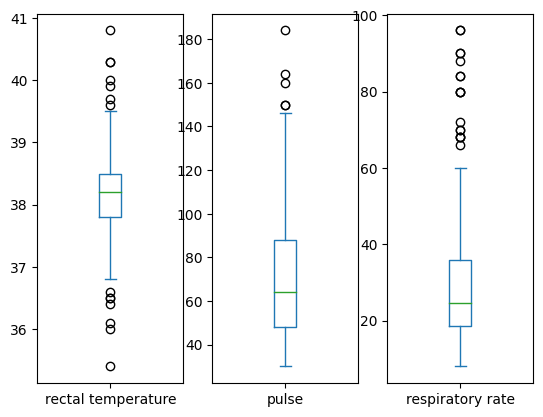

In [ ]:
# Выбросы
# для количественных столбцов изобраим графики

plt.subplot(1, 3, 1)
df_horse['rectal temperature'].plot(kind='box')

plt.subplot(1, 3, 2)
df_horse['pulse'].plot(kind='box')

plt.subplot(1, 3, 3)
df_horse['respiratory rate'].plot(kind='box')

In [ ]:
# Определим выбросы через межквартльный размах

surgery_lower_bound = df_horse['surgery'].quantile(0.25) - (1.5 * IQR_surgery )
surgery_upper_bound = df_horse['surgery'].quantile(0.75) + (1.5 * IQR_surgery )

# surgery_remove_outliers =  df_horse[df_horse['surgery']\
                        #  .between(surgery_lower_bound, surgery_upper_bound, inclusive=True)]

surgery_remove_outliers =  df_horse[~df_horse['surgery']\
                          .between(surgery_lower_bound, surgery_upper_bound, inclusive=True)]
surgery_remove_outliers

<ipython-input-13-2b95adfc7f78>:9: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  surgery_remove_outliers =  df_horse[~df_horse['surgery']\


,surgery,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
132,NaN,1,38.0,48.0,20.0,3.0,4.0,NaN


In [ ]:
age_lower_bound = df_horse['age'].quantile(0.25) - (1.5 * IQR_age  )
age_upper_bound = df_horse['age'].quantile(0.75) + (1.5 * IQR_age  )

age_remove_outliers =  df_horse[~df_horse['age']\
                          .between(age_lower_bound, age_upper_bound, inclusive=True)]
age_remove_outliers.head(10)

<ipython-input-14-999e6e92aa82>:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  age_remove_outliers =  df_horse[~df_horse['age']\


,surgery,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
3,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
9,2.0,2,38.3,90.0,NaN,1.0,5.0,1.0
13,2.0,2,38.0,92.0,28.0,1.0,1.0,2.0
16,1.0,2,NaN,128.0,36.0,3.0,4.0,2.0
23,1.0,2,38.3,130.0,60.0,NaN,2.0,1.0
39,1.0,2,39.2,146.0,96.0,NaN,NaN,2.0
41,2.0,2,39.0,150.0,72.0,NaN,NaN,1.0
55,1.0,2,38.6,160.0,20.0,3.0,3.0,2.0
74,1.0,2,NaN,NaN,NaN,NaN,NaN,2.0
75,1.0,2,39.7,100.0,NaN,3.0,2.0,3.0


In [ ]:
# кол-во выбросов по столбцу 'age'
print( f"  count\n{age_remove_outliers['age'].value_counts()}" )

  count
2    24
Name: age, dtype: int64


In [ ]:
rectal_temp_lower_bound = df_horse['rectal temperature'].quantile(0.25) - (1.5 * IQR_rectal_temp  )
rectal_temp_upper_bound = df_horse['rectal temperature'].quantile(0.75) + (1.5 * IQR_rectal_temp )

rectal_temp_remove_outliers =  df_horse[~df_horse['rectal temperature']\
                          .between(rectal_temp_lower_bound, rectal_temp_upper_bound, inclusive=True)]
rectal_temp_remove_outliers

<ipython-input-16-86aecb18eefd>:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  rectal_temp_remove_outliers =  df_horse[~df_horse['rectal temperature']\


,surgery,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
5,2.0,1,NaN,NaN,NaN,2.0,2.0,1.0
7,1.0,1,NaN,60.0,NaN,3.0,NaN,2.0
8,2.0,1,NaN,80.0,36.0,3.0,4.0,3.0
16,1.0,2,NaN,128.0,36.0,3.0,4.0,2.0
20,1.0,1,39.9,72.0,60.0,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...
282,1.0,1,NaN,70.0,16.0,3.0,2.0,2.0
288,1.0,1,NaN,NaN,NaN,NaN,NaN,1.0
293,1.0,1,NaN,78.0,24.0,3.0,NaN,3.0
295,1.0,1,NaN,120.0,70.0,4.0,2.0,3.0


In [ ]:
# кол-во выбросов по столбцу 'rectal temperature'
print( f"  count\n{rectal_temp_remove_outliers['rectal temperature'].value_counts()}" )

  count
40.3    2
36.5    2
39.9    1
35.4    1
39.7    1
36.4    1
39.6    1
36.0    1
36.1    1
36.6    1
40.8    1
40.0    1
Name: rectal temperature, dtype: int64


In [ ]:
pulse_lower_bound = df_horse['pulse'].quantile(0.25) - (1.5 * IQR_pulse  )
pulse_upper_bound = df_horse['pulse'].quantile(0.75) + (1.5 * IQR_pulse )

pulse_remove_outliers =  df_horse[~df_horse['pulse']\
                          .between(pulse_lower_bound, pulse_upper_bound, inclusive=True)]
pulse_remove_outliers.head(10)

<ipython-input-18-a51fe5bd67b7>:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  pulse_remove_outliers =  df_horse[~df_horse['pulse']\


,surgery,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
3,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
5,2.0,1,NaN,NaN,NaN,2.0,2.0,1.0
28,1.0,1,NaN,NaN,NaN,NaN,NaN,2.0
41,2.0,2,39.0,150.0,72.0,NaN,NaN,1.0
52,2.0,1,NaN,NaN,NaN,1.0,1.0,1.0
55,1.0,2,38.6,160.0,20.0,3.0,3.0,2.0
56,1.0,1,NaN,NaN,NaN,NaN,NaN,1.0
58,1.0,1,NaN,NaN,20.0,4.0,5.0,2.0
74,1.0,2,NaN,NaN,NaN,NaN,NaN,2.0
78,1.0,1,NaN,NaN,NaN,3.0,5.0,2.0


In [ ]:
# кол-во выбросов по столбцу 'pulse'
print( f"  count\n{pulse_remove_outliers['pulse'].value_counts()}" )

  count
150.0    2
164.0    1
160.0    1
184.0    1
Name: pulse, dtype: int64


In [ ]:
prespiratiry_rate_lower_bound = df_horse['respiratory rate'].quantile(0.25) - (1.5 * IQR_prespiratiry_rate )
prespiratiry_rate_upper_bound = df_horse['respiratory rate'].quantile(0.75) + (1.5 * IQR_prespiratiry_rate )

prespiratiry_rate_remove_outliers =  df_horse[~df_horse['respiratory rate']\
                          .between(prespiratiry_rate_lower_bound, prespiratiry_rate_upper_bound, inclusive=True)]

prespiratiry_rate_remove_outliers

<ipython-input-20-b70231677354>:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  prespiratiry_rate_remove_outliers =  df_horse[~df_horse['respiratory rate']\


,surgery,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
3,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
5,2.0,1,NaN,NaN,NaN,2.0,2.0,1.0
7,1.0,1,NaN,60.0,NaN,3.0,NaN,2.0
9,2.0,2,38.3,90.0,NaN,1.0,5.0,1.0
28,1.0,1,NaN,NaN,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...
274,1.0,1,NaN,76.0,NaN,NaN,NaN,3.0
281,2.0,1,40.0,78.0,NaN,3.0,2.0,2.0
284,2.0,1,38.5,54.0,NaN,1.0,3.0,1.0
288,1.0,1,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
# кол-во выбросов по столбцу 'prespiratory rate'
print( f"  count\n{prespiratiry_rate_remove_outliers['respiratory rate'].value_counts()}" )

  count
80.0    3
68.0    3
84.0    2
96.0    2
90.0    2
70.0    2
72.0    1
66.0    1
88.0    1
Name: respiratory rate, dtype: int64


In [ ]:
temp_of_extrem_lower_bound = df_horse['temperature of extremities'].quantile(0.25) - (1.5 *  IQR_temp_of_extrem )
temp_of_extrem_upper_bound = df_horse['temperature of extremities'].quantile(0.75) + (1.5 *  IQR_temp_of_extrem )

temp_of_extrem_remove_outliers =  df_horse[~df_horse['temperature of extremities']\
                          .between(temp_of_extrem_lower_bound, temp_of_extrem_upper_bound, inclusive=True)]
temp_of_extrem_remove_outliers.head(10)

<ipython-input-22-51c1a1aa5e9d>:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  temp_of_extrem_remove_outliers =  df_horse[~df_horse['temperature of extremities']\


,surgery,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
17,2.0,1,37.5,48.0,24.0,NaN,NaN,1.0
23,1.0,2,38.3,130.0,60.0,NaN,2.0,1.0
25,2.0,1,37.8,60.0,42.0,NaN,NaN,1.0
28,1.0,1,NaN,NaN,NaN,NaN,NaN,2.0
36,2.0,1,38.3,112.0,16.0,NaN,NaN,3.0
37,1.0,1,37.8,72.0,NaN,NaN,5.0,1.0
39,1.0,2,39.2,146.0,96.0,NaN,NaN,2.0
41,2.0,2,39.0,150.0,72.0,NaN,NaN,1.0


In [ ]:
# кол-во выбросов по столбцу 'temperature of extremities'
print( f"  count\n{temp_of_extrem_remove_outliers['temperature of extremities'].value_counts()}" )

  count
Series([], Name: temperature of extremities, dtype: int64)


In [ ]:
pain_lower_bound = df_horse['pain'].quantile(0.25) - (1.5 * IQR_pain )
pain_upper_bound = df_horse['pain'].quantile(0.75) + (1.5 * IQR_pain )

pain_remove_outliers =  df_horse[~df_horse['pain']\
                          .between(pain_lower_bound, pain_upper_bound, inclusive=True)]
pain_remove_outliers.head(10)

<ipython-input-24-a9a81a3208cd>:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  pain_remove_outliers =  df_horse[~df_horse['pain']\


,surgery,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
7,1.0,1,NaN,60.0,NaN,3.0,NaN,2.0
17,2.0,1,37.5,48.0,24.0,NaN,NaN,1.0
19,2.0,1,39.4,110.0,35.0,4.0,NaN,1.0
24,1.0,1,38.1,60.0,12.0,3.0,NaN,1.0
25,2.0,1,37.8,60.0,42.0,NaN,NaN,1.0
27,1.0,1,37.8,48.0,12.0,3.0,NaN,1.0
28,1.0,1,NaN,NaN,NaN,NaN,NaN,2.0
36,2.0,1,38.3,112.0,16.0,NaN,NaN,3.0
39,1.0,2,39.2,146.0,96.0,NaN,NaN,2.0


In [ ]:
# кол-во выбросов по столбцу 'pain'
print( f"  count\n{pain_remove_outliers['pain'].value_counts()}" )

  count
Series([], Name: pain, dtype: int64)


In [ ]:
outcome_lower_bound = df_horse['outcome'].quantile(0.25) - (1.5 * IQR_outcome )
outcome_upper_bound = df_horse['outcome'].quantile(0.75) + (1.5 * IQR_outcome )

outcome_remove_outliers =  df_horse[~df_horse['outcome']\
                          .between(outcome_lower_bound, outcome_upper_bound, inclusive=True)]
outcome_remove_outliers.head(10)

<ipython-input-26-75ff985918dc>:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  outcome_remove_outliers =  df_horse[~df_horse['outcome']\


,surgery,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
132,NaN,1,38.0,48.0,20.0,3.0,4.0,NaN


In [ ]:
# кол-во выбросов по столбцу 'outcome'
print( f"  count\n{outcome_remove_outliers['outcome'].value_counts()}" )

  count
Series([], Name: outcome, dtype: int64)



Задание 3. Работа с пропусками
Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

In [ ]:
#  сформируем датафрейм, в котором будем заполнять пропуски
df_no_pass = df_horse

df_no_pass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     299 non-null    float64
 1   age                         300 non-null    int64  
 2   rectal temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory rate            242 non-null    float64
 5   temperature of extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


In [ ]:
df_no_pass.describe()

,surgery,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,299.000000,300.000000,240.000000,276.000000,242.000000,244.000000,245.00000,299.000000
mean,1.397993,1.080000,38.167917,71.913043,30.417355,2.348361,2.95102,1.551839
std,0.490305,0.271746,0.732289,28.630557,17.642231,1.045054,1.30794,0.737187
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.00000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.500000,1.000000,2.00000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,24.500000,3.000000,3.00000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.00000,2.000000
max,2.000000,2.000000,40.800000,184.000000,96.000000,4.000000,5.00000,3.000000


In [ ]:
# Пропуски по столбцам
(df_no_pass.isna().mean() * 100).round(2)

surgery                        0.33
age                            0.00
rectal temperature            20.00
pulse                          8.00
respiratory rate              19.33
temperature of extremities    18.67
pain                          18.33
outcome                        0.33
dtype: float64

In [ ]:
#  заполним сначала пропуски в категориальных столбцах.
#  меньше всего пропусков в столбцах 'surgery' и 'outcome' . Найдем эти пропуски
df_no_pass[ pd.isnull(df_no_pass['surgery']) ]

,surgery,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
132,NaN,1,38.0,48.0,20.0,3.0,4.0,NaN


In [ ]:
df_no_pass[ pd.isnull(df_no_pass['outcome']) ]

,surgery,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
132,NaN,1,38.0,48.0,20.0,3.0,4.0,NaN


In [ ]:
#  пропуски в столбцах 'outcome' и 'surgery' встреяаются только в одной строке.
# Остальные признаки по другим столбцам близки к значению Моды - заполним пропуски модальными значениями.

df_no_pass['surgery'].fillna(df_no_pass['surgery'].mode()[0], inplace=True)

df_no_pass['outcome'].fillna(df_no_pass['outcome'].mode()[0], inplace=True)

print( f"пропуски в столбце 'surgery' {df_no_pass['surgery'].isna().sum()}" )
print( f"пропуски в столбце 'outcome' {df_no_pass['outcome'].isna().sum()}" )

пропуски в столбце 'surgery' 0
пропуски в столбце 'outcome' 0


In [ ]:
#  пропуски в столбце 'temperature of extremities'.
#  сравним заполнение пропусков Модой и Мединаой
df_no_pass[ pd.isnull(df_no_pass['temperature of extremities']) ].head(10)

,surgery,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
17,2.0,1,37.5,48.0,24.0,NaN,NaN,1.0
23,1.0,2,38.3,130.0,60.0,NaN,2.0,1.0
25,2.0,1,37.8,60.0,42.0,NaN,NaN,1.0
28,1.0,1,NaN,NaN,NaN,NaN,NaN,2.0
36,2.0,1,38.3,112.0,16.0,NaN,NaN,3.0
37,1.0,1,37.8,72.0,NaN,NaN,5.0,1.0
39,1.0,2,39.2,146.0,96.0,NaN,NaN,2.0
41,2.0,2,39.0,150.0,72.0,NaN,NaN,1.0


In [ ]:
temp_of_ext_median = df_no_pass
temp_of_ext_median['temperature of extremities'].fillna(temp_of_ext_median['temperature of extremities'].median(), inplace=True)
temp_of_ext_median['temperature of extremities'].describe()

count    300.000000
mean       2.470000
std        0.975845
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: temperature of extremities, dtype: float64

In [ ]:
temp_of_ext_mode = df_no_pass
temp_of_ext_mode['temperature of extremities'].fillna(temp_of_ext_mode['temperature of extremities'].mode()[0], inplace=True)
temp_of_ext_mode['temperature of extremities'].describe()

count    300.000000
mean       2.470000
std        0.975845
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: temperature of extremities, dtype: float64

In [ ]:
# значения СКО и среднего арифм.-го - одинаковы. Заполняем пропуски медианой.
df_no_pass['temperature of extremities'].fillna(df_no_pass['temperature of extremities'].median(), inplace=True)
df_no_pass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     300 non-null    float64
 1   age                         300 non-null    int64  
 2   rectal temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory rate            242 non-null    float64
 5   temperature of extremities  300 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     300 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


In [ ]:
#  пропуски в столбце 'pain'
#  сравним заполнение пропусков Модой и Мединаой
df_no_pass[ pd.isnull(df_no_pass['pain']) ].head(10)

,surgery,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
4,2.0,1,37.3,104.0,35.0,3.0,NaN,2.0
7,1.0,1,NaN,60.0,NaN,3.0,NaN,2.0
17,2.0,1,37.5,48.0,24.0,3.0,NaN,1.0
19,2.0,1,39.4,110.0,35.0,4.0,NaN,1.0
24,1.0,1,38.1,60.0,12.0,3.0,NaN,1.0
25,2.0,1,37.8,60.0,42.0,3.0,NaN,1.0
27,1.0,1,37.8,48.0,12.0,3.0,NaN,1.0
28,1.0,1,NaN,NaN,NaN,3.0,NaN,2.0
36,2.0,1,38.3,112.0,16.0,3.0,NaN,3.0
39,1.0,2,39.2,146.0,96.0,3.0,NaN,2.0


In [ ]:
pain_median = df_no_pass
pain_median['pain'].fillna(pain_median['pain'].median(), inplace=True)
pain_median['pain'].describe()

count    300.000000
mean       2.960000
std        1.181689
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: pain, dtype: float64

In [ ]:
pain_mode = df_no_pass
pain_mode['pain'].fillna(temp_of_ext_mode['pain'].mode()[0], inplace=True)
pain_mode['pain'].describe()

count    300.000000
mean       2.960000
std        1.181689
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: pain, dtype: float64

In [ ]:
# значения СКО и среднего арифм.-го - одинаковы. Заполняем пропуски медианой.
df_no_pass['pain'].fillna(df_no_pass['pain'].median(), inplace=True)
df_no_pass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     300 non-null    float64
 1   age                         300 non-null    int64  
 2   rectal temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory rate            242 non-null    float64
 5   temperature of extremities  300 non-null    float64
 6   pain                        300 non-null    float64
 7   outcome                     300 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


In [ ]:
# заполнение пропусков в столбцах 'rectal temperature' / 'pulse' / 'respiratory rate'
# заполним пропуски медианным значением в столбцах в разрезе категориальных признаков, и определим зависимости

print('Столбец - pulse\n')

pulse_1 = df_no_pass
pulse_1['pulse'].fillna(pulse_1.groupby(['surgery', 'age'])['pulse'].transform('median'), inplace=True)
print("pulse_1\n",pulse_1.groupby(['surgery', 'age'])['pulse'].median() )

pulse_2 = df_no_pass
pulse_2['pulse'].fillna(pulse_2.groupby(['pain' , 'age'])['pulse'].transform('median'), inplace=True)
print("pulse_2\n", pulse_2.groupby(['pain' , 'age'])['pulse'].median() )

pulse_3 = df_no_pass
pulse_3['pulse'].fillna(pulse_3.groupby(['outcome' , 'age'])['pulse'].transform('median'), inplace=True)
print("pulse_3\n", pulse_3.groupby(['outcome' , 'age'])['pulse'].median() )

pulse_4 = df_no_pass
pulse_4['pulse'].fillna(pulse_4.groupby(['surgery', 'pain'])['pulse'].transform('median'), inplace=True)
print("pulse_4\n", pulse_4.groupby(['surgery', 'pain'])['pulse'].median() )

pulse_5 = df_no_pass
pulse_5['pulse'].fillna(pulse_5.groupby(['surgery', 'outcome'])['pulse'].transform('median'), inplace=True)
print("pulse_5\n", pulse_5.groupby(['surgery', 'outcome'])['pulse'].median() )

pulse_6 = df_no_pass
pulse_6['pulse'].fillna(pulse_6.groupby(['temperature of extremities', 'pain'])['pulse'].transform('median'), inplace=True)
print("pulse_6\n", pulse_6.groupby(['temperature of extremities', 'pain'])['pulse'].median() )

Столбец - pulse

pulse_1
 surgery  age
1.0      1       66.0
         2      129.0
2.0      1       54.0
         2       91.0
Name: pulse, dtype: float64
pulse_2
 pain  age
1.0   1       48.0
      2       92.0
2.0   1       71.0
      2      124.0
3.0   1       60.0
      2      124.5
4.0   1       72.0
      2      128.0
5.0   1       78.0
      2      136.0
Name: pulse, dtype: float64
pulse_3
 outcome  age
1.0      1       54.0
         2      120.0
2.0      1       72.0
         2      136.0
3.0      1       80.0
         2      100.0
Name: pulse, dtype: float64
pulse_4
 surgery  pain
1.0      1.0     48.0
         2.0     84.0
         3.0     64.0
         4.0     68.0
         5.0     72.0
2.0      1.0     48.0
         2.0     56.0
         3.0     54.0
         4.0     83.0
         5.0     96.0
Name: pulse, dtype: float64
pulse_5
 surgery  outcome
1.0      1.0        64.0
         2.0        77.5
         3.0        80.0
2.0      1.0        52.0
         2.0        88.0
    

In [ ]:
#  можно выявить зависимость столбца 'pulse' от категорий 'age' и 'pain'. Заполним пропуски -значениями медианой
df_no_pass['pulse'].fillna(df_no_pass.groupby(['pain', 'age'])['pulse'].transform('median'), inplace=True)
df_no_pass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     300 non-null    float64
 1   age                         300 non-null    int64  
 2   rectal temperature          240 non-null    float64
 3   pulse                       300 non-null    float64
 4   respiratory rate            242 non-null    float64
 5   temperature of extremities  300 non-null    float64
 6   pain                        300 non-null    float64
 7   outcome                     300 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


In [ ]:
# заполним пропуски медианным значением в столбцах в разрезе категориальных признаков, и определим зависимости

print('Столбец - respiratory rate\n')

resp_rate_1 = df_no_pass
resp_rate_1['respiratory rate'].fillna(resp_rate_1.groupby(['surgery', 'age'])['respiratory rate'].transform('median'), inplace=True)
print("resp_rate_1\n",resp_rate_1.groupby(['surgery', 'age'])['respiratory rate'].median() )

resp_rate_2 = df_no_pass
resp_rate_2['respiratory rate'].fillna(resp_rate_2.groupby(['pain' , 'age'])['respiratory rate'].transform('median'), inplace=True)
print("resp_rate_2\n",resp_rate_2.groupby(['pain' , 'age'])['respiratory rate'].median() )

resp_rate_3 = df_no_pass
resp_rate_3['respiratory rate'].fillna(resp_rate_3.groupby(['outcome' , 'age'])['respiratory rate'].transform('median'), inplace=True)
print( "resp_rate_3\n",resp_rate_3.groupby(['outcome' , 'age'])['respiratory rate'].median() )

resp_rate_4 = df_no_pass
resp_rate_4['respiratory rate'].fillna(resp_rate_4.groupby(['age', 'surgery'])['respiratory rate'].transform('median'), inplace=True)
print( "resp_rate_4\n",resp_rate_4.groupby(['age', 'surgery'])['respiratory rate'].median() )

resp_rate_5 = df_no_pass
resp_rate_5['respiratory rate'].fillna(resp_rate_5.groupby(['pain', 'surgery'])['respiratory rate'].transform('median'), inplace=True)
print( "resp_rate_5\n",resp_rate_5.groupby(['pain', 'surgery'])['respiratory rate'].median() )

resp_rate_6 = df_no_pass
resp_rate_6['respiratory rate'].fillna(resp_rate_6.groupby(['outcome', 'surgery'])['respiratory rate'].transform('median'), inplace=True)
print( "resp_rate_6\n",resp_rate_6.groupby(['outcome', 'surgery'])['respiratory rate'].median() )

resp_rate_7 = df_no_pass
resp_rate_7['respiratory rate'].fillna(resp_rate_7.groupby(['age', 'pain'])['respiratory rate'].transform('median'), inplace=True)
print( "resp_rate_7\n",resp_rate_7.groupby(['age', 'pain'])['respiratory rate'].median() )

resp_rate_8 = df_no_pass
resp_rate_8['respiratory rate'].fillna(resp_rate_8.groupby(['surgery', 'pain'])['respiratory rate'].transform('median'), inplace=True)
print( "resp_rate_8\n",resp_rate_8.groupby(['surgery', 'pain'])['respiratory rate'].median() )

resp_rate_9 = df_no_pass
resp_rate_9['respiratory rate'].fillna(resp_rate_9.groupby(['outcome', 'pain'])['respiratory rate'].transform('median'), inplace=True)
print(  "resp_rate_9\n",resp_rate_9.groupby(['outcome', 'pain'])['respiratory rate'].median() )

resp_rate_10 = df_no_pass
resp_rate_10['respiratory rate'].fillna(resp_rate_10.groupby(['age', 'outcome'])['respiratory rate'].transform('median'), inplace=True)
print( "resp_rate_10\n",resp_rate_10.groupby(['age', 'outcome'])['respiratory rate'].median() )

resp_rate_11 = df_no_pass
resp_rate_11['respiratory rate'].fillna(resp_rate_11.groupby(['surgery', 'outcome'])['respiratory rate'].transform('median'), inplace=True)
print( "resp_rate_11\n",resp_rate_11.groupby(['surgery', 'outcome'])['respiratory rate'].median() )

resp_rate_12 = df_no_pass
resp_rate_12['respiratory rate'].fillna(resp_rate_12.groupby(['pain', 'outcome'])['respiratory rate'].transform('median'), inplace=True)
print( "resp_rate_12\n",resp_rate_12.groupby(['pain', 'outcome'])['respiratory rate'].median() )

resp_rate_13 = df_no_pass
resp_rate_13['respiratory rate'].fillna(resp_rate_13.groupby(['pain', 'temperature of extremities'])['respiratory rate'].transform('median'), inplace=True)
print( "resp_rate_13\n",resp_rate_13.groupby(['pain', 'temperature of extremities'])['respiratory rate'].median() )

resp_rate_14 = df_no_pass
resp_rate_14['respiratory rate'].fillna(resp_rate_14.groupby(['surgery', 'temperature of extremities'])['respiratory rate'].transform('median'), inplace=True)
print("resp_rate_14\n",resp_rate_14.groupby(['surgery', 'temperature of extremities'])['respiratory rate'].median() )

resp_rate_15 = df_no_pass
resp_rate_15['respiratory rate'].fillna(resp_rate_15.groupby(['age', 'temperature of extremities'])['respiratory rate'].transform('median'), inplace=True)
print("resp_rate_15\n",resp_rate_15.groupby(['age', 'temperature of extremities'])['respiratory rate'].median() )

resp_rate_16 = df_no_pass
resp_rate_16['respiratory rate'].fillna(resp_rate_16.groupby(['outcome', 'temperature of extremities'])['respiratory rate'].transform('median'), inplace=True)
print("resp_rate_16\n",resp_rate_16.groupby(['outcome', 'temperature of extremities'])['respiratory rate'].median() )

Столбец - respiratory rate

resp_rate_1
 surgery  age
1.0      1      24.0
         2      60.0
2.0      1      24.0
         2      30.0
Name: respiratory rate, dtype: float64
resp_rate_2
 pain  age
1.0   1      20.0
      2      28.0
2.0   1      24.0
      2      60.0
3.0   1      24.0
      2      60.0
4.0   1      24.0
      2      44.0
5.0   1      24.0
      2      48.0
Name: respiratory rate, dtype: float64
resp_rate_3
 outcome  age
1.0      1      24.0
         2      60.0
2.0      1      24.0
         2      48.0
3.0      1      24.0
         2      60.0
Name: respiratory rate, dtype: float64
resp_rate_4
 age  surgery
1    1.0        24.0
     2.0        24.0
2    1.0        60.0
     2.0        30.0
Name: respiratory rate, dtype: float64
resp_rate_5
 pain  surgery
1.0   1.0        16.0
      2.0        20.0
2.0   1.0        36.0
      2.0        24.0
3.0   1.0        24.0
      2.0        24.0
4.0   1.0        24.0
      2.0        24.0
5.0   1.0        24.0
      2.0       

In [ ]:
#  можно выявить зависимость столбца 'respiratory_rate' от категорий 'age' и  'outcome'. Заполним пропуски - значениями медианой

df_no_pass['respiratory rate'].fillna(df_no_pass.groupby(['age', 'outcome'])['respiratory rate'].transform('median'), inplace=True)
df_no_pass.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     300 non-null    float64
 1   age                         300 non-null    int64  
 2   rectal temperature          240 non-null    float64
 3   pulse                       300 non-null    float64
 4   respiratory rate            300 non-null    float64
 5   temperature of extremities  300 non-null    float64
 6   pain                        300 non-null    float64
 7   outcome                     300 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


In [ ]:
# заполним пропуски медианным значением в столбцах в разрезе категориальных признаков, и определим зависимости

print('Столбец - rectal temperature\n')

rect_temp_1 = df_no_pass
rect_temp_1['respiratory rate'].fillna(rect_temp_1.groupby(['surgery', 'age'])['rectal temperature'].transform('median'), inplace=True)
print( "rect_temp_1\n", rect_temp_1.groupby(['surgery', 'age'])['rectal temperature'].median() )

rect_temp_2 = df_no_pass
rect_temp_2['respiratory rate'].fillna(rect_temp_2.groupby(['pain' , 'age'])['rectal temperature'].transform('median'), inplace=True)
print( "rect_temp_2\n", rect_temp_2.groupby(['pain' , 'age'])['rectal temperature'].median() )

rect_temp_3 = df_no_pass
rect_temp_3['respiratory rate'].fillna(rect_temp_3.groupby(['outcome' , 'age'])['rectal temperature'].transform('median'), inplace=True)
print( "rect_temp_3\n", rect_temp_3.groupby(['outcome' , 'age'])['rectal temperature'].median() )

rect_temp_4 = df_no_pass
rect_temp_4['respiratory rate'].fillna(rect_temp_4.groupby(['age', 'surgery'])['rectal temperature'].transform('median'), inplace=True)
print( "rect_temp_4\n", rect_temp_4.groupby(['age', 'surgery'])['rectal temperature'].median() )

rect_temp_5 = df_no_pass
rect_temp_5['respiratory rate'].fillna(rect_temp_5.groupby(['pain', 'surgery'])['rectal temperature'].transform('median'), inplace=True)
print( "rect_temp_5\n", rect_temp_5.groupby(['pain', 'surgery'])['rectal temperature'].median() )

rect_temp_6 = df_no_pass
rect_temp_6['respiratory rate'].fillna(rect_temp_6.groupby(['outcome', 'surgery'])['rectal temperature'].transform('median'), inplace=True)
print("rect_temp_6\n", rect_temp_6.groupby(['outcome', 'surgery'])['rectal temperature'].median() )

rect_temp_7 = df_no_pass
rect_temp_7['respiratory rate'].fillna(rect_temp_7.groupby(['age', 'pain'])['rectal temperature'].transform('median'), inplace=True)
print( "rect_temp_7\n", rect_temp_7.groupby(['age', 'pain'])['rectal temperature'].median() )

rect_temp_8 = df_no_pass
rect_temp_8['respiratory rate'].fillna(rect_temp_8.groupby(['surgery', 'pain'])['rectal temperature'].transform('median'), inplace=True)
print( "rect_temp_8\n", rect_temp_8.groupby(['surgery', 'pain'])['rectal temperature'].median() )

rect_temp_9 = df_no_pass
rect_temp_9['respiratory rate'].fillna(rect_temp_9.groupby(['outcome', 'pain'])['rectal temperature'].transform('median'), inplace=True)
print( "rect_temp_9\n", rect_temp_9.groupby(['outcome', 'pain'])['rectal temperature'].median() )

rect_temp_10 = df_no_pass
rect_temp_10['respiratory rate'].fillna(rect_temp_10.groupby(['age', 'outcome'])['rectal temperature'].transform('median'), inplace=True)
print( "rect_temp_10\n", rect_temp_10.groupby(['age', 'outcome'])['rectal temperature'].median() )

rect_temp_11 = df_no_pass
rect_temp_11['respiratory rate'].fillna(rect_temp_11.groupby(['surgery', 'outcome'])['rectal temperature'].transform('median'), inplace=True)
print( "rect_temp_11\n", rect_temp_11.groupby(['surgery', 'outcome'])['rectal temperature'].median() )

rect_temp_12 = df_no_pass
rect_temp_12['respiratory rate'].fillna(rect_temp_12.groupby(['pain', 'outcome'])['rectal temperature'].transform('median'), inplace=True)
print( "rect_temp_12\n", rect_temp_12.groupby(['pain', 'outcome'])['rectal temperature'].median() )

Столбец - rectal temperature

rect_temp_1
 surgery  age
1.0      1      38.1
         2      38.6
2.0      1      38.2
         2      38.6
Name: rectal temperature, dtype: float64
rect_temp_2
 pain  age
1.0   1      38.20
      2      38.00
2.0   1      38.30
      2      38.80
3.0   1      38.05
      2      38.60
4.0   1      38.00
      2      38.80
5.0   1      38.00
      2      38.30
Name: rectal temperature, dtype: float64
rect_temp_3
 outcome  age
1.0      1      38.2
         2      38.4
2.0      1      38.0
         2      38.8
3.0      1      38.0
         2      39.7
Name: rectal temperature, dtype: float64
rect_temp_4
 age  surgery
1    1.0        38.1
     2.0        38.2
2    1.0        38.6
     2.0        38.6
Name: rectal temperature, dtype: float64
rect_temp_5
 pain  surgery
1.0   1.0        38.10
      2.0        38.25
2.0   1.0        38.30
      2.0        38.30
3.0   1.0        38.20
      2.0        38.00
4.0   1.0        38.10
      2.0        37.90
5.0   1.0 

In [ ]:
#  можно выявить зависимость столбца 'rectal temperature' от категорий 'age' и 'surgery'. Заполним пропуски - значениями медианой

df_no_pass['rectal temperature'].fillna(df_no_pass.groupby(['age', 'surgery'])['rectal temperature'].transform('median'), inplace=True)
df_no_pass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     300 non-null    float64
 1   age                         300 non-null    int64  
 2   rectal temperature          300 non-null    float64
 3   pulse                       300 non-null    float64
 4   respiratory rate            300 non-null    float64
 5   temperature of extremities  300 non-null    float64
 6   pain                        300 non-null    float64
 7   outcome                     300 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


In [ ]:
# Сравнение статистики с пропусками и без

# Базовый датафрейм
df_horse.describe()

,surgery,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.396667,1.080000,38.167333,71.540000,29.556667,2.470000,2.960000,1.550000
std,0.490023,0.271746,0.657094,28.032024,16.320170,0.975845,1.181689,0.736642
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,37.900000,48.000000,20.000000,1.000000,2.000000,1.000000
50%,1.000000,1.000000,38.100000,64.500000,24.000000,3.000000,3.000000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,35.250000,3.000000,4.000000,2.000000
max,2.000000,2.000000,40.800000,184.000000,96.000000,4.000000,5.000000,3.000000


In [ ]:
# Датафрейм без пропусков
df_no_pass.describe()

,surgery,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.396667,1.080000,38.167333,71.540000,29.556667,2.470000,2.960000,1.550000
std,0.490023,0.271746,0.657094,28.032024,16.320170,0.975845,1.181689,0.736642
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,37.900000,48.000000,20.000000,1.000000,2.000000,1.000000
50%,1.000000,1.000000,38.100000,64.500000,24.000000,3.000000,3.000000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,35.250000,3.000000,4.000000,2.000000
max,2.000000,2.000000,40.800000,184.000000,96.000000,4.000000,5.000000,3.000000


In [ ]:
# Значение Моды (Базовый датафрейм):

print( f"surgery: {df_horse['surgery'].mode()[0]}" )
print( f"age: {df_horse['age'].mode()[0]}" )
print( f"rectal_temp: {df_horse['rectal temperature'].mode()[0]}" )
print( f"pulse: {df_horse['pulse'].mode()[0]}" )
print( f"respiratiry_rate: {df_horse['respiratory rate'].mode()[0]}" )
print( f"temp_of_extrem: {df_horse['temperature of extremities'].mode()[0]}" )
print( f"pain: {df_horse['pain'].mode()[0]}" )
print( f"outcome: {df_horse['outcome'].mode()[0]}" )



surgery: 1.0
age: 1
rectal_temp: 38.1
pulse: 48.0
respiratiry_rate: 24.0
temp_of_extrem: 3.0
pain: 3.0
outcome: 1.0


In [ ]:
# Значение Моды (Датафрейм без пропусков):

print( f"surgery: {df_no_pass['surgery'].mode()[0]}" )
print( f"age: {df_no_pass['age'].mode()[0]}" )
print( f"rectal_temp: {df_no_pass['rectal temperature'].mode()[0]}" )
print( f"pulse: {df_no_pass['pulse'].mode()[0]}" )
print( f"respiratiry_rate: {df_no_pass['respiratory rate'].mode()[0]}" )
print( f"temp_of_extrem: {df_no_pass['temperature of extremities'].mode()[0]}" )
print( f"pain: {df_no_pass['pain'].mode()[0]}" )
print( f"outcome: {df_no_pass['outcome'].mode()[0]}" )

surgery: 1.0
age: 1
rectal_temp: 38.1
pulse: 48.0
respiratiry_rate: 24.0
temp_of_extrem: 3.0
pain: 3.0
outcome: 1.0


Заполнение пропусков в датафрейме не повлияло на  статистические показатели СКО, сред. арифметическое, значение моды и медианы